Import all the relevant packages.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from my_func import *
from torchsummary import summary

Define the architecture of the two neural networks we are going to compare.

In [2]:

class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, num_classes)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x       

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #self.conv1 = nn.Conv2d(in_channels=3, out_channels=15, kernel_size=11, padding=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=15, kernel_size=7, padding=3)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(34560, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = self.dropout1(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        #x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

Set device to cuda if it exists, otherwise run on cpu.

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device.type

'cuda'

Define input size(only used for linnear model), number of classes in the dataset, learning rate, batch size, number of epochs and the classes in the given dataset(for testing accuracy later).

In [4]:
input_size = 96*96*3
num_classes = 10
learning_rate = 0.0001
batch_size = 64 
num_epochs = 50
classes = ('airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')

Load/download the desired dataset. Split them into train and test sets.

In [5]:
train_dataset = datasets.STL10(root = 'dataset/', split = 'train', transform = transforms.ToTensor(), download = True)
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_dataset = datasets.STL10(root = 'dataset/', split = 'test', transform = transforms.ToTensor(), download = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


Create the models and define lossfunction and optimizer.

In [6]:
linear_model = NN(input_size = input_size, num_classes = num_classes).to(device = device)
convolutional_model = CNN().to(device = device)

criterion = nn.CrossEntropyLoss()

linear_optimizer = optim.Adam(linear_model.parameters(), lr = learning_rate)
convolutional_optimizer = optim.Adam(convolutional_model.parameters(), lr = learning_rate)

Train both models using their forward function and my own train function(see my_func.py).

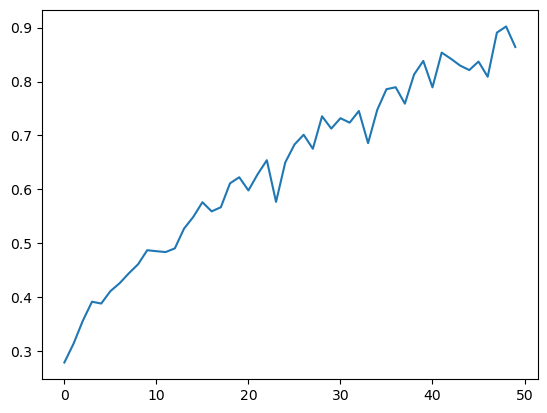

In [7]:
my_train(linear_model, num_epochs, train_loader, criterion, linear_optimizer, device) #Train Linear model

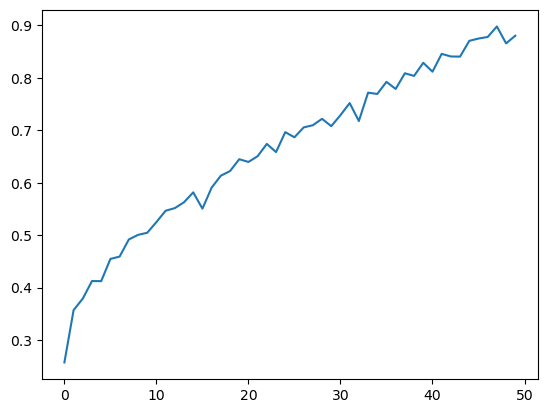

In [8]:
my_train(convolutional_model, num_epochs, train_loader, criterion, convolutional_optimizer, device) #Train convolutional model

Check overall accuracy on train and test sets with both models.

In [9]:
print("Linear model(STL10): ")
check_STLaccuracy(train_loader, linear_model, device)
check_STLaccuracy(test_loader, linear_model, device)
print(" \nConvolutional model(STL10): ")
check_STLaccuracy(train_loader, convolutional_model, device)
check_STLaccuracy(test_loader, convolutional_model, device)

Linear model(STL10): 
Checking accuracy on the training data
Got 4320 / 5000 with accuracy 86.40
Checking accuracy on test data
Got 3211 / 8000 with accuracy 40.14
 
Convolutional model(STL10): 
Checking accuracy on the training data
Got 4401 / 5000 with accuracy 88.02
Checking accuracy on test data
Got 3873 / 8000 with accuracy 48.41


Check the accuracy of the models based on specific classes in the datasets.

In [10]:
#print("Checking accuracy of convolutional model(STL10): \n")
check_accuracy_by_class(classes, test_loader, device, linear_model)
#print("Number of parameters in Linear NN:", sum(p.numel() for p in linear_model.parameters() if p.requires_grad))
summary(linear_model)

Accuracy for class: airplane is 57.2 %
Accuracy for class: bird  is 24.2 %
Accuracy for class: car   is 57.8 %
Accuracy for class: cat   is 47.5 %
Accuracy for class: deer  is 37.0 %
Accuracy for class: dog   is 35.1 %
Accuracy for class: horse is 23.5 %
Accuracy for class: monkey is 12.0 %
Accuracy for class: ship  is 70.2 %
Accuracy for class: truck is 36.8 %
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            11,059,600
├─Linear: 1-2                            80,200
├─Linear: 1-3                            2,010
Total params: 11,141,810
Trainable params: 11,141,810
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            11,059,600
├─Linear: 1-2                            80,200
├─Linear: 1-3                            2,010
Total params: 11,141,810
Trainable params: 11,141,810
Non-trainable params: 0

In [11]:
#print("Checking accuracy of convolutional model: \n")
check_accuracy_by_class(classes, test_loader, device, convolutional_model)
#print("Number of parameters in convolutional NN:", sum(p.numel() for p in convolutional_model.parameters() if p.requires_grad))
summary(convolutional_model)

Accuracy for class: airplane is 62.8 %
Accuracy for class: bird  is 29.2 %
Accuracy for class: car   is 54.9 %
Accuracy for class: cat   is 26.5 %
Accuracy for class: deer  is 60.5 %
Accuracy for class: dog   is 15.4 %
Accuracy for class: horse is 53.6 %
Accuracy for class: monkey is 51.6 %
Accuracy for class: ship  is 71.9 %
Accuracy for class: truck is 57.8 %
Layer (type:depth-idx)                   Param #
├─MaxPool2d: 1-1                         --
├─Conv2d: 1-2                            2,220
├─Dropout: 1-3                           --
├─Dropout: 1-4                           --
├─Linear: 1-5                            4,147,320
├─Linear: 1-6                            10,164
├─Linear: 1-7                            850
Total params: 4,160,554
Trainable params: 4,160,554
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─MaxPool2d: 1-1                         --
├─Conv2d: 1-2                            2,220
├─Dropout: 1-3                           --
├─Dropout: 1-4                           --
├─Linear: 1-5                            4,147,320
├─Linear: 1-6                            10,164
├─Linear: 1-7                            850
Total params: 4,160,554
Trainable params: 4,160,554
Non-trainable params: 0